In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import get_trial_dataframe
from utils import get_trial_paths
from utils import analysis_pipeline

In [3]:
# Replace with the path to the logs directory in multi-memory-task
logs_path = '/Users/isabella/multi-memory-task/logs' 

# Replace this with the name of the dataset directories
datasets = ["2023_06_16_09_43_45","2023_06_16_09_43_45","2023_06_16_10_09_12"]

trial_paths = get_trial_paths.get_trial_paths(logs_path=logs_path, datasets=datasets)
df = get_trial_dataframe.get_trial_dataframe(trial_paths=trial_paths)

Number of trials:  115


In [4]:
df.columns

Index(['trial_num', 'time', 'block_id', 'visible', 'ltm', 'object_0_x',
       'object_0_y', 'object_0_id', 'object_0_theta', 'object_1_x',
       'object_1_y', 'object_1_id', 'object_1_theta', 'object_2_x',
       'object_2_y', 'object_2_id', 'object_2_theta', 'object_3_x',
       'object_3_y', 'object_3_id', 'object_3_theta', 'object_4_x',
       'object_4_y', 'object_4_id', 'object_4_theta', 'object_5_x',
       'object_5_y', 'object_5_id', 'object_5_theta', 'target_id', 'target_x',
       'target_y', 'target_theta', 'num_object', 'response_object_ind',
       'response_x', 'response_id', 'response_theta', 'correct', 'response_y',
       'visible_s', 'delay_s', 'last_vis_time', 'long_delay_s',
       'long_visible_s'],
      dtype='object')

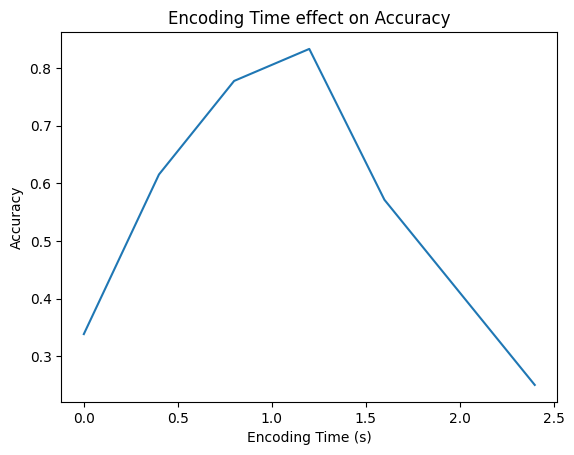

In [16]:
analysis_pipeline.round("visible_s",df)
analysis_pipeline.plot_accuracy("rounded_visible_s", df, "Encoding Time (s)", "Accuracy", "Encoding Time effect on Accuracy")

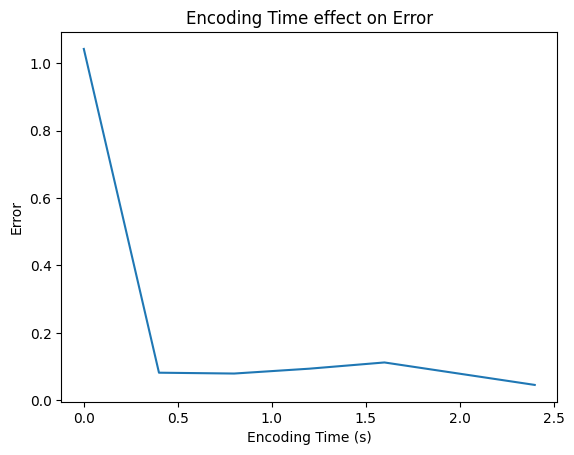

In [17]:
analysis_pipeline.plot_error("rounded_visible_s", df, "Encoding Time (s)", "Error", "Encoding Time effect on Error")

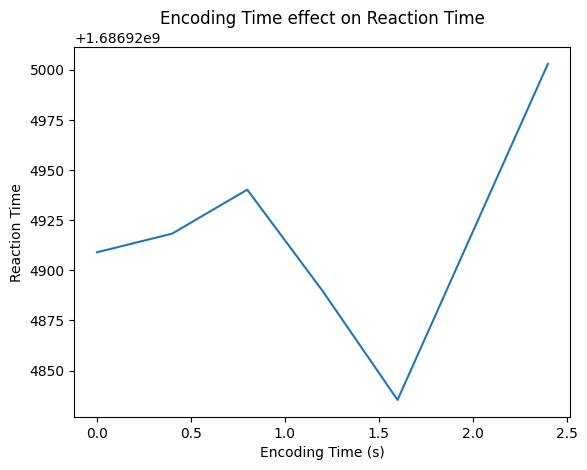

In [13]:
analysis_pipeline.plot_rt("rounded_visible_s", df, "Encoding Time (s)", "Reaction Time", "Encoding Time effect on Reaction Time")

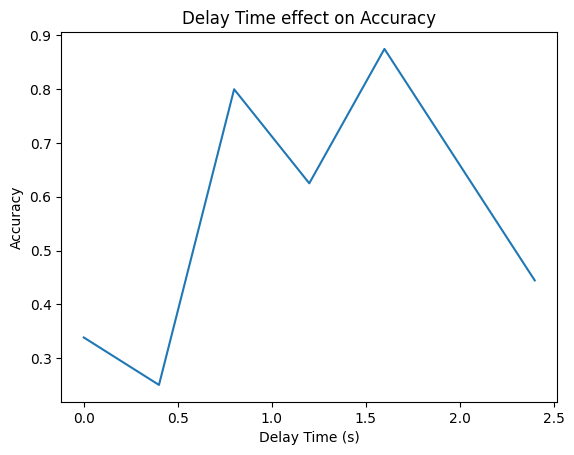

In [20]:
analysis_pipeline.round("delay_s",df)
analysis_pipeline.plot_accuracy("rounded_delay_s", df, "Delay Time (s)", "Accuracy", "Delay Time effect on Accuracy")

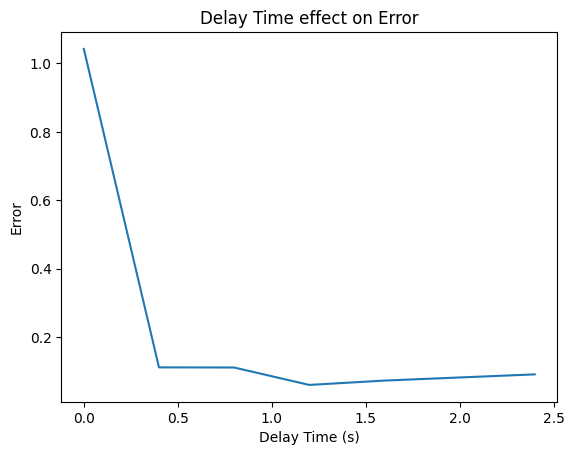

In [22]:
analysis_pipeline.plot_error("rounded_delay_s", df, "Delay Time (s)", "Error", "Delay Time effect on Error")

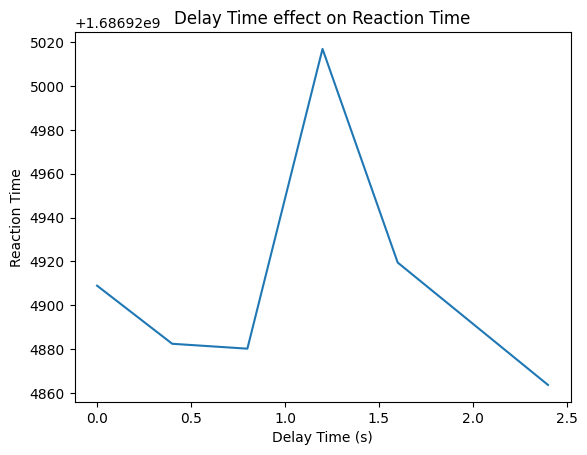

In [38]:
analysis_pipeline.plot_rt("rounded_delay_s", df, "Delay Time (s)", "Reaction Time", "Delay Time effect on Reaction Time")

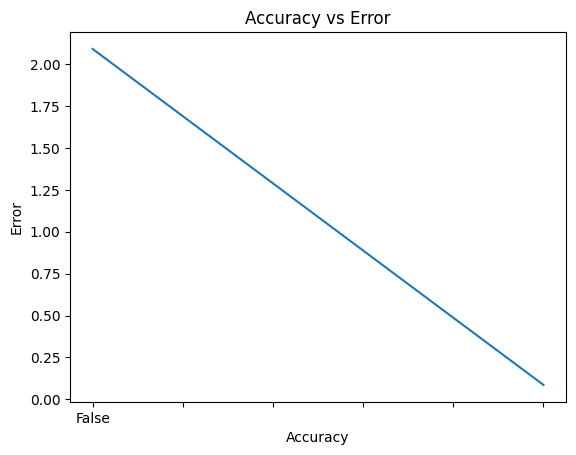

In [27]:
analysis_pipeline.plot_error("correct", df, "Accuracy", "Error", "Accuracy vs Error")

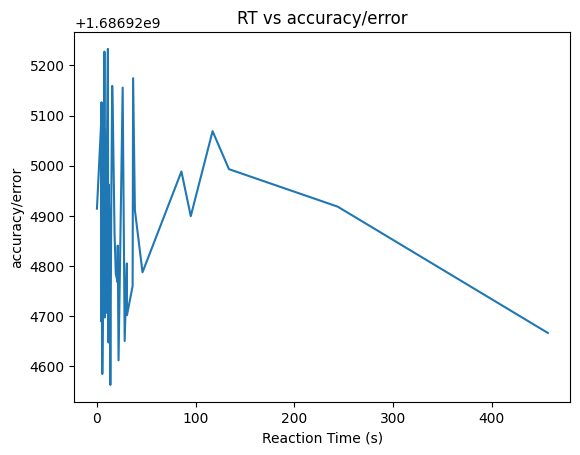

In [34]:
df['accuracy/error'] = df['correct'] / df['precision_difference_0'].abs()
analysis_pipeline.plot_rt('accuracy/error',df,'Reaction Time (s)', 'accuracy/error', 'RT vs accuracy/error')